In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt

In [34]:
from sklearn.metrics import mean_squared_error

In [3]:
size = 300

### Target features

In [4]:
X = np.random.rand(size) * 5 - 2.5

### Prediction target

$$
y = 1 \cdot x^{4} + 1 \cdot x^{3} + 2 \cdot x^{3} + 1 \cdot x^{2} + -4 \cdot x + 2
$$

In [5]:
coefs = [2, -4, 1, 2, 1]
y = coefs[4]*(X**4) + coefs[3]*(X**3) + coefs[2]*(X**2) + coefs[1]*X + coefs[0] + np.random.rand(size)*8-4

### Load data

In [6]:
df = pd.DataFrame({'X': X, 'y': y})

### Choose target features

In [16]:
X = df[['X']]
X.head()

,X
0,-0.514948
1,0.339651
2,0.991530
3,1.812553
4,-1.712460


### Choose prediction target

In [17]:
y = df[['y']]
y.head()

,y
0,6.168488
1,0.112858
2,-1.585361
3,20.599224
4,10.133632


### Split the data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [19]:
df.to_csv("dane.csv", index=None)

<AxesSubplot:xlabel='X', ylabel='y'>

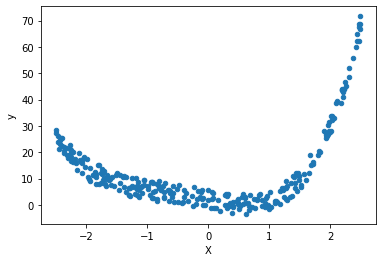

In [20]:
df.plot.scatter(x='X', y='y')

## Linear regressor

In [21]:
from sklearn.linear_model import LinearRegression

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [25]:
sep = "\t\t:\t"

In [120]:
print(f"""
intercept{sep}{lin_reg.intercept_}
coef{sep}{lin_reg.coef_}
f(x=2){sep}{lin_reg.predict([[2]])}
MSE{sep}{mean_squared_error(y_test, lin_reg.predict(X_test))}
""")


intercept		:	[12.94053555]
coef		:	[[3.74796985]]
f(x=2)		:	[[20.43647524]]
MSE		:	212.02463582277954



/usr/local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [125]:
lin_reg_mse_test = mean_squared_error(y_test, lin_reg.predict(X_test))
lin_reg_mse_train = mean_squared_error(y_train, lin_reg.predict(X_train))
# print(lin_reg_mse_test, lin_reg_mse_train)

212.02463582277954 185.06372147892307


## K-Nearest Neighbors

In [37]:
from sklearn.neighbors import KNeighborsRegressor

#### k = 3

In [38]:
knn_3_reg = KNeighborsRegressor(n_neighbors=3)

In [39]:
knn_3_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [40]:
print(f"""
f(x=2){sep}{knn_3_reg.predict([[2]])}
MSE{sep}{mean_squared_error(y_test, knn_3_reg.predict(X_test))}
""")


f(x=2)		:	[[29.78559001]]
MSE		:	5.842559174843406



/usr/local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [126]:
knn_3_reg_mse_test = mean_squared_error(y_test, knn_3_reg.predict(X_test))
knn_3_reg_mse_train = mean_squared_error(y_train, knn_3_reg.predict(X_train))
print(knn_3_reg_mse_test, knn_3_reg_mse_train)

5.842559174843406 3.9532030100595295


#### k = 5

In [41]:
knn_5_reg = KNeighborsRegressor(n_neighbors=5)

In [98]:
knn_5_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [99]:
print(f"""
f(x=2){sep}{knn_5_reg.predict([[2]])}
MSE{sep}{mean_squared_error(y_test, knn_5_reg.predict(X_test))}
""")


f(x=2)		:	[[29.78151721]]
MSE		:	5.1084019257790825



/usr/local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [127]:
knn_5_reg_mse_test = mean_squared_error(y_test, knn_5_reg.predict(X_test))
knn_5_reg_mse_train = mean_squared_error(y_train, knn_5_reg.predict(X_train))
print(knn_5_reg_mse_test, knn_5_reg_mse_train)

5.1084019257790825 4.847593492660225


## Polynomial Regressor

In [44]:
from sklearn.preprocessing import PolynomialFeatures

##### Polynomial Features

In [115]:
poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_3 = PolynomialFeatures(degree=3, include_bias=False)
poly_4 = PolynomialFeatures(degree=4, include_bias=False)
poly_5 = PolynomialFeatures(degree=5, include_bias=False)

##### Transform X

In [116]:
X_train_2 = poly_2.fit_transform(X_train)
X_test_2 = poly_2.fit_transform(X_test)

X_train_3 = poly_3.fit_transform(X_train)
X_test_3 = poly_3.fit_transform(X_test)

X_train_4 = poly_4.fit_transform(X_train)
X_test_4 = poly_4.fit_transform(X_test)

X_train_5 = poly_5.fit_transform(X_train)
X_test_5 = poly_5.fit_transform(X_test)

In [117]:
lin_2_reg = LinearRegression()
lin_2_reg.fit(X_train_2, y_train)

lin_3_reg = LinearRegression()
lin_3_reg.fit(X_train_3, y_train)

lin_4_reg = LinearRegression()
lin_4_reg.fit(X_train_4, y_train)

lin_5_reg = LinearRegression()
lin_5_reg.fit(X_train_5, y_train)

LinearRegression()

In [118]:
# print(f"y-intercept: {lin_2_reg.intercept_[0]}")
# ind = 0
# for c in lin_2_reg.coef_[0]:
#     print(f"coef{ind}: {c}")
#     ind += 1

$$
    y = 6.5 \cdot x^{2} + 3.5 \cdot x -1.3
$$

In [119]:
# print(lin_2_reg.coef_[0][1] * 2**2 + lin_2_reg.coef_[0][0] * 2 + lin_reg.intercept_[0])

In [114]:
pred_2 = lin_2_reg.predict(X_test_2)
print(f"MSE: {mean_squared_error(y_test, pred_2)}")

MSE: 40.16612817192206


In [128]:
poly_2_reg_mse_test = mean_squared_error(y_test, lin_2_reg.predict(X_test_2))
poly_2_reg_mse_train = mean_squared_error(y_train, lin_2_reg.predict(X_train_2))
print(poly_2_reg_mse_test, poly_2_reg_mse_train)

40.16612817192206 38.497938002858504


In [129]:
poly_3_reg_mse_test = mean_squared_error(y_test, lin_3_reg.predict(X_test_3))
poly_3_reg_mse_train = mean_squared_error(y_train, lin_3_reg.predict(X_train_3))
print(poly_3_reg_mse_test, poly_3_reg_mse_train)

17.57411051404602 14.239734175914892


In [130]:
poly_4_reg_mse_test = mean_squared_error(y_test, lin_4_reg.predict(X_test_4))
poly_4_reg_mse_train = mean_squared_error(y_train, lin_4_reg.predict(X_train_4))
print(poly_4_reg_mse_test, poly_4_reg_mse_train)

4.688543744107737 4.867469025475779


In [131]:
poly_5_reg_mse_test = mean_squared_error(y_test, lin_5_reg.predict(X_test_5))
poly_5_reg_mse_train = mean_squared_error(y_train, lin_5_reg.predict(X_train_5))
print(poly_5_reg_mse_test, poly_5_reg_mse_train)

4.708257785505959 4.865697958890069


#### DataFrame containing MSE values

In [135]:
train_mse = [lin_reg_mse_train, knn_3_reg_mse_train, knn_5_reg_mse_train, poly_2_reg_mse_train, poly_3_reg_mse_train, poly_4_reg_mse_train, poly_5_reg_mse_train]
test_mse = [lin_reg_mse_test, knn_3_reg_mse_test, knn_5_reg_mse_test, poly_2_reg_mse_test, poly_3_reg_mse_test, poly_4_reg_mse_test, poly_5_reg_mse_test]

index_mse = ["lin_reg", "knn_3_reg", "knn_5_reg", "poly_2_reg", "poly_3_reg", "poly_4_reg", "poly_5_reg"]

In [136]:
df_mse = pd.DataFrame({"train_mse": train_mse, "test_mse": test_mse}, index=index_mse)
df_mse

,train_mse,test_mse
lin_reg,185.063721,212.024636
knn_3_reg,3.953203,5.842559
knn_5_reg,4.847593,5.108402
poly_2_reg,38.497938,40.166128
poly_3_reg,14.239734,17.574111
poly_4_reg,4.867469,4.688544
poly_5_reg,4.865698,4.708258


In [137]:
import pickle

In [138]:
with open('mse.pkl', 'wb') as f:
    pickle.dump(df_mse, f, pickle.HIGHEST_PROTOCOL)

In [141]:
list_reg = [(lin_reg, None), (knn_3_reg, None), (knn_5_reg, None), (lin_2_reg, poly_2), (lin_3_reg, poly_3), (lin_4_reg, poly_4), (lin_5_reg, poly_5)]
with open('reg.pkl', 'wb') as f:
    pickle.dump(list_reg, f, pickle.HIGHEST_PROTOCOL)

In [142]:
with open('mse.pkl', 'rb') as f:
    print(pickle.load(f))
    
with open('reg.pkl', 'rb') as f:
    print(pickle.load(f))

             train_mse    test_mse
lin_reg     185.063721  212.024636
knn_3_reg     3.953203    5.842559
knn_5_reg     4.847593    5.108402
poly_2_reg   38.497938   40.166128
poly_3_reg   14.239734   17.574111
poly_4_reg    4.867469    4.688544
poly_5_reg    4.865698    4.708258
[(LinearRegression(), None), (KNeighborsRegressor(n_neighbors=3), None), (KNeighborsRegressor(), None), (LinearRegression(), PolynomialFeatures(include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=3, include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=4, include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=5, include_bias=False))]
